# 인코딩

## 단어 기반 인코딩

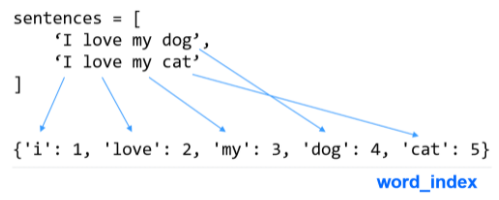

- Tokenizer(num_words = 100) : num_words를 단어 빈도수가 높은 순으로 100개만 사용한다는 의미이다. 나머지는 고려하지 않는다.
  - numwords : 단어 빈도가 많은 순서대로 num_words개의 단어를 보존한다.
  - filter : 걸러낼 문자 리스트를 적어준다. 디폴트 : !"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n
  - lower : 소문자를 변환할지 Ture, False
  - split : 단어를 분리하는 기준을 적어줌
  - char_level : True인 경우 모든 문자가 토큰으로 처리가 된다.
  - oov_token : <\OOV> <\UNK> 값이 지정된 경우, text_sequence호출과정에서 word_index가 추가되어서 out-of-vocabulary words로 대체
- fit_on_texts : 문자 데이터를 입력받아서 리스트의 형태로 변환
- word_index : tokenizer의 word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환한다. 이때, 반환 시 자동으로 소문자로 변환되어 들어간다. 그리고 느낌표나 마침표 같은 구두점은 자동으로 제거된다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
]

tokenizer = Tokenizer(filters='') 
tokenizer.fit_on_texts(sentences) # 문자 데이터를 입력받아서 리스트의 형태로 변환

# 토큰별 단어에 index를 매핑시켜준다. word2index 단어장 생성
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'my': 2, 'd': 3, 'g': 4, 'cat': 5}


## 텍스트를 시퀀스로 변환하기

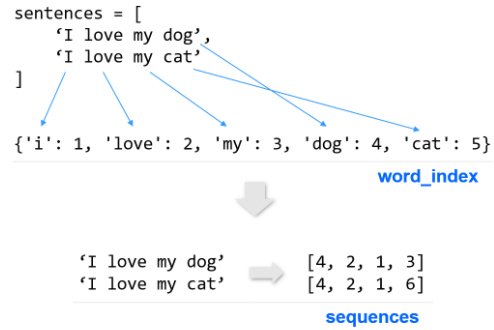

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index # 단어장 생성

# texts_to_sequences로 텍스트를 시퀀스로 변환합니다.
sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


## 패딩설정하기

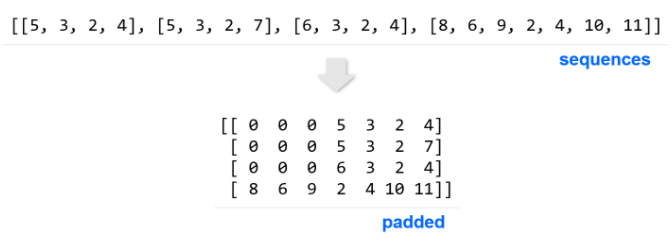

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]
